In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
import numpy as np

In [2]:
df_train = pd.read_csv("train_DR.csv")
df_test = pd.read_csv("test_DR.csv")

In [3]:
df_train.shape

(42000, 785)

In [4]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Data preparation

In [6]:
Y = to_categorical(df_train['label'])
Y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [7]:
df_train = df_train.drop(['label'],axis=1)

In [8]:
X = df_train.to_numpy()

In [9]:
X.shape

(42000, 784)

In [10]:
a=X.mean().astype(np.float32)
a

33.408913

In [11]:
b =X.std().astype(np.float32)
b

78.67774

In [12]:
#X = (X - a)/(b)
#X

In [13]:
X.shape

(42000, 784)

In [14]:
a=X[6].reshape(28,28)

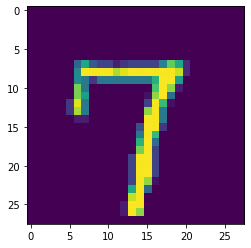

In [15]:
plt.imshow(a)

In [16]:
df_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X_train,X_val,y_train,y_val = train_test_split(X,Y,train_size = 0.8)

In [18]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)

In [19]:
X_train.shape

(33600, 28, 28, 1)

In [20]:
X_val = X_val.reshape(X_val.shape[0],28,28,1)

In [21]:
X_val.shape

(8400, 28, 28, 1)

In [22]:
x = df_test.to_numpy()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
#at=x.mean().astype(np.float32)
#bt =x.std().astype(np.float32)
#x = (x-at)/(bt)

In [24]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
x = x.reshape(x.shape[0],28,28,1)

In [26]:
X_test = x.reshape(x.shape[0],28,28,1)

In [27]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_val = X_val.astype('float32') / 255

In [28]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [29]:
# creating NN model

In [30]:
in_dim  = X_train.shape[1]
in_dim

28

In [31]:
'''''mod = Sequential()
mod.add(Flatten(input_shape = [28,28]))
mod.add(Dense(64,activation="relu", kernel_initializer='uniform'))
mod.add(Dense(64,activation="relu"))
mod.add(Dense(10,activation = "softmax"))
mod.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy']) '''

'\'\'mod = Sequential()\nmod.add(Flatten(input_shape = [28,28]))\nmod.add(Dense(64,activation="relu", kernel_initializer=\'uniform\'))\nmod.add(Dense(64,activation="relu"))\nmod.add(Dense(10,activation = "softmax"))\nmod.compile(loss="categorical_crossentropy", optimizer="adam", metrics=[\'accuracy\']) '

In [32]:
''''history = mod.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=50, batch_size=64, verbose=True)'''

"'history = mod.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=50, batch_size=64, verbose=True)"

In [33]:
'''pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()'''

'pd.DataFrame(history.history).plot(figsize=(8, 5))\nplt.grid(True)\nplt.gca().set_ylim(0, 1)\nplt.show()'

In [34]:
#Using Batch normalization

In [35]:
mod = Sequential()
mod.add(Flatten(input_shape = [28,28]))
mod.add(Dense(64,activation="relu", kernel_initializer='uniform'))
tf.keras.layers.BatchNormalization(),
mod.add(Dense(64,activation="relu"))
tf.keras.layers.BatchNormalization(),
mod.add(Dense(10,activation = "softmax"))
mod.compile(loss="categorical_crossentropy", optimizer="Adamax", metrics=['accuracy']) 

In [36]:
history = mod.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=100, batch_size=256, verbose=True)

Epoch 1/100
132/132 [==============================] - 1s 5ms/step - loss: 0.9148 - accuracy: 0.7675 - val_loss: 0.4098 - val_accuracy: 0.8943
Epoch 2/100
132/132 [==============================] - 1s 4ms/step - loss: 0.3439 - accuracy: 0.9074 - val_loss: 0.3025 - val_accuracy: 0.9171
Epoch 3/100
132/132 [==============================] - 1s 4ms/step - loss: 0.2729 - accuracy: 0.9242 - val_loss: 0.2601 - val_accuracy: 0.9255
Epoch 4/100
132/132 [==============================] - 0s 3ms/step - loss: 0.2381 - accuracy: 0.9323 - val_loss: 0.2382 - val_accuracy: 0.9323
Epoch 5/100
132/132 [==============================] - 0s 4ms/step - loss: 0.2126 - accuracy: 0.9405 - val_loss: 0.2170 - val_accuracy: 0.9389
Epoch 6/100
132/132 [==============================] - 0s 4ms/step - loss: 0.1936 - accuracy: 0.9456 - val_loss: 0.2008 - val_accuracy: 0.9429
Epoch 7/100
132/132 [==============================] - 0s 3ms/step - loss: 0.1778 - accuracy: 0.9502 - val_loss: 0.1877 - val_accuracy: 0.9454

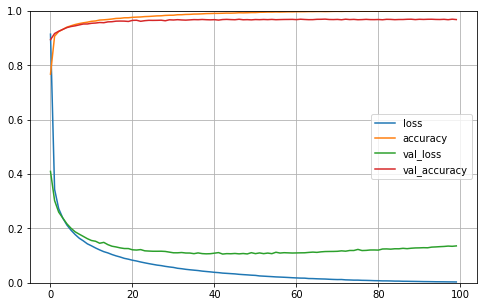

In [37]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [38]:
#As shown above it is very difficult to go above 88% accuarcy unless we use a pretrained keras model and 
#expect that there is some transfer learning 

In [39]:
#The best improvement on any image dataset would be using a convulated neural network model since it follows
#a heirchical approcah and because of its high accuracy.

In [40]:
data_train = ImageDataGenerator(
    rotation_range = 12, 
    width_shift_range = 0.1, 
    height_shift_range = 0.1, 
    zoom_range = 0.17,
 )

data_valid = ImageDataGenerator()

train_gen = data_train.flow(X_train, y_train, batch_size = 64, shuffle = True)
valid_gen = data_valid.flow(X_val, y_val, batch_size = 64, shuffle = True)

In [41]:
print(X_train.shape,X_test.shape,y_train.shape)

(33600, 28, 28, 1) (28000, 28, 28, 1) (33600, 10)


In [42]:
#CNN

In [43]:
input_shape = (28,28,1)

In [44]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'))
#model.add(Conv2D(32, (5, 5)))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(5,5), padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(256,activation='relu',name ='final_layer'))
model.add(Dropout(0.4))
#model.add(Dense(92,activation = 'relu',kernel_initializer='he_uniform',name = "final_layer"))
model.add(Dense(10,activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        51264     
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)       

In [46]:
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [47]:
variable_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor = 0.2, patience = 2)

In [48]:
class cust_callback(Callback):
    def __init__(self,monitor='accuracy',baseline = 0.9):
        super(cust_callback,self).__init__()
        self.monitor = monitor
        self.baseline = baseline
    def on_epoch_end(self,epoch,logs=None):
        logs = logs or {}
        acc = logs.get(self.monitor)
        if acc is not None:
            if acc>=self.baseline:
                print("stopping due to callback")
                self.model.stop_training = True

In [ ]:
history = model.fit(train_gen,batch_size=64,epochs=50,verbose=1,validation_data=(valid_gen),callbacks = [cust_callback(monitor ='accuracy',baseline = 1.0),variable_learning_rate])

Epoch 1/50
525/525 [==============================] - 1012s 2s/step - loss: 0.7538 - accuracy: 0.8025 - val_loss: 0.4519 - val_accuracy: 0.8793 - lr: 0.0010
Epoch 2/50
525/525 [==============================] - 1009s 2s/step - loss: 0.2386 - accuracy: 0.9333 - val_loss: 0.0930 - val_accuracy: 0.9751 - lr: 0.0010
Epoch 3/50
525/525 [==============================] - 1010s 2s/step - loss: 0.1841 - accuracy: 0.9490 - val_loss: 0.1213 - val_accuracy: 0.9760 - lr: 0.0010
Epoch 4/50
172/525 [========>.....................] - ETA: 12:52 - loss: 0.1557 - accuracy: 0.9562

In [ ]:
model.summary()

In [ ]:
#transfer learning to traditional ml algorithms

In [ ]:
Mod = Model(inputs = model.input,outputs = model.get_layer('final_layer').output)

In [ ]:
X_train_new = Mod.predict(X_train)

In [ ]:
X_test_new = Mod.predict(X_test)

In [ ]:
print(X_train_new.shape)
print(X_test_new.shape)

In [ ]:
X_train_new  = X_train_new.reshape(33600,4*4*64)
X_test_new = X_test_new.reshape(28000,4*4*64)

In [ ]:
y_train = np.argmax(y_train,axis=1)
y_train

In [ ]:
X_train_new

In [ ]:
X_test_new

In [ ]:
#Applying KNN (transfer learning)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train_new,y_train)

In [ ]:
kpred = knn.predict(X_test_new)
kpred

In [ ]:
model.save("Model_CNN")

In [ ]:
model_cnn = keras.models.load_model("Model_CNN")

In [ ]:
mod = Sequential(model_cnn.layers[:-1])
#mod = Sequential()
mod.add(Flatten(input_shape = [28,28]))
mod.add(Dense(64,activation="relu", kernel_initializer='uniform'))
mod.add(Dense(64,activation="relu"))
mod.add(Dense(10,activation = "softmax"))
mod.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
mod.summary()

In [ ]:
history = mod.fit(X_train, y_train,batch_size=256,epochs=50,verbose=1,validation_data=(X_val, y_val),callbacks = [cust_callback(monitor = 'accuracy',baseline = 1.0)])

In [ ]:
pred = mod.predict(x)
pred

In [ ]:
pred = np.argmax(pred,axis=1)
pred

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['Label'] = kpred
sample_submission.head()

In [ ]:
sample_submission.to_csv('submission.csv',index = False)